## Importation des librairies nécessaires

In [2]:
import pandas as pd
from PIL import Image
import pytesseract
from pdf2image import convert_from_path, convert_from_bytes
import os
from collections import Counter
import re
from spellchecker import SpellChecker
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import spacy

C:\Users\adrien\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\adrien\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\adrien\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\adrien\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

# Première Etude - premier data set

## Data Preparation

In [168]:
#Partie traduction des données 

#lignes tres importantes sans lesquelles les librairies  ne marchent pas 
path = r"C:/Users/adrien/Desktop/EICNAM/2ème année/Echantillonage/Projet"
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
pop_path = "C:/Program Files/poppler-0.68.0/bin"

In [169]:
#initialisation du correcteur python en français
import sys
spell = SpellChecker(language='fr')
nlp = spacy.load('fr_core_news_md')

In [170]:
#initialisation du correcteur python en français
spell = SpellChecker(language='fr')

In [171]:
#Création d'une liste de mot inutile
final_stopwords_list = list(fr_stop)

In [172]:
data = pd.DataFrame(columns = ['Y', 'X'])
liste_fichier = os.listdir(path)
indexData = 0
for elem in liste_fichier :
    if elem[-4:] ==".pdf":
        print("\n fichier :" + elem)
        situation = elem[0]
        #permet de convertir les pdf en image
        pages = convert_from_path(elem, 200,poppler_path=pop_path) 
        liste_mot = []
        for i, page in enumerate(pages):
            #permet de traduire les mots identifer sur l'image en string
            text = pytesseract.image_to_string(page,lang='fra')
            text_minuscule = text.lower()
            text_minuscule = text_minuscule.replace('\n',' ')
            div = re.split('[^a-zA-Zà-î]', text_minuscule)
            liste_test = " ".join(div)
            #Lemnatisation : for token in nlp(text_minuscule) :
            for token in nlp(liste_test) :
                liste_mot.append(token.lemma_)
            l = []
            #Mettre for mot in "div" pour la div et "liste_mot" pour la lemmatisation
            for mot in div:
                #correction des mots mal traduits par pytesseract
                mot2 = spell.correction(mot)
                #on ne garde le mot que si il est plus long que deux lettres et qu'il n'appartient pas a la liste des stopwords
                if mot2 not in list(final_stopwords_list) and len(mot2)>1 :
                    l.append(mot2)
            ##Création du dataframe 
            text = " ".join(l)
            data.loc[indexData, "X"] = text
            data.loc[indexData, "Y"] = situation
            indexData += 1


 fichier :attestation hebergement - 1.pdf

 fichier :attestation hebergement - 2.pdf

 fichier :attestation hebergement - 3.pdf

 fichier :attestation hebergement - 4.pdf

 fichier :attestation hebergement - 5.pdf

 fichier :attestation hebergement.pdf

 fichier :bulletin_paie-1.pdf

 fichier :bulletin_paie-2.pdf

 fichier :bulletin_paie-3.pdf

 fichier :favis taxe fonciere 1.pdf

 fichier :favis taxe fonciere 2.pdf

 fichier :favis taxe fonciere 3.pdf

 fichier :favis taxe fonciere 4.pdf

 fichier :favis taxe fonciere 5.pdf

 fichier :favis taxe fonciere.pdf

 fichier :impot-1.pdf

 fichier :impot-10.pdf

 fichier :impot-11.pdf

 fichier :impot-12.pdf

 fichier :impot-13.pdf

 fichier :impot-14.pdf

 fichier :impot-15.pdf

 fichier :impot-16.pdf

 fichier :impot-17.pdf

 fichier :impot-18.pdf

 fichier :releve_compte-1.pdf

 fichier :releve_compte-2.pdf


In [173]:
data

,Y,X
0,a,saint louis rue huningue saint louis tél intér...
1,a,paris septembre soussigné atteste présente héb...
2,a,avenue pasteur bagnole bagnole septembre souss...
3,a,bd anatole france lyon madame monsieur soussig...
4,a,monsieur avenue madhurit moreau paris paris no...
5,a,attestation hébergement soussignés parents héb...
6,b,date ancienneté an mois intitulé code travail ...
7,b,lieu travail paris urssaf montreur bulletin pé...
8,b,lieue travail nose nose rue bachaumont rue bac...
9,b,bulletin paie periode payable monterai sire st...


In [174]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Y       58 non-null     object
 1   X       58 non-null     object
dtypes: object(2)
memory usage: 3.4+ KB
None


In [175]:
data.to_csv(r'C:\Users\adrien\Desktop\EICNAM\2ème année\Echantillonage\Projet\data.csv', index=False)

In [216]:
import pandas
df = pandas.read_csv('data.csv',encoding="utf-8")
df

,Y,X
0,a,saint louis rue huningue saint louis tél intér...
1,a,paris septembre soussigné atteste présente héb...
2,a,avenue pasteur bagnole bagnole septembre souss...
3,a,bd anatole france lyon madame monsieur soussig...
4,a,monsieur avenue madhurit moreau paris paris no...
5,a,attestation hébergement soussignés parents héb...
6,b,date ancienneté an mois intitulé code travail ...
7,b,lieu travail paris urssaf montreur bulletin pé...
8,b,lieue travail nose nose rue bachaumont rue bac...
9,b,bulletin paie periode payable monterai sire st...


In [217]:
df['Y'] = df['Y'].replace('a','attestation hébergement')
df['Y'] = df['Y'].replace('b','bulletin de paie')
df['Y'] = df['Y'].replace('f','avis taxe foncière')
df['Y'] = df['Y'].replace('i','Fiche impot')
df['Y'] = df['Y'].replace('r','Relevé de compte')

In [218]:
df

,Y,X
0,attestation hébergement,saint louis rue huningue saint louis tél intér...
1,attestation hébergement,paris septembre soussigné atteste présente héb...
2,attestation hébergement,avenue pasteur bagnole bagnole septembre souss...
3,attestation hébergement,bd anatole france lyon madame monsieur soussig...
4,attestation hébergement,monsieur avenue madhurit moreau paris paris no...
5,attestation hébergement,attestation hébergement soussignés parents héb...
6,bulletin de paie,date ancienneté an mois intitulé code travail ...
7,bulletin de paie,lieu travail paris urssaf montreur bulletin pé...
8,bulletin de paie,lieue travail nose nose rue bachaumont rue bac...
9,bulletin de paie,bulletin paie periode payable monterai sire st...


In [219]:
df['Y'].value_counts()

Fiche impot                30
avis taxe foncière         12
attestation hébergement     6
bulletin de paie            5
Relevé de compte            5
Name: Y, dtype: int64

In [220]:
df.to_json (r'C:\Users\adrien\Desktop\EICNAM\2ème année\Echantillonage\Projet\df.json')

In [221]:
import json

with open('df.json') as json_data:
    data_dict = json.load(json_data)

data_str = json.dumps(data_dict)

data_dict = json.loads(data_str)
print(data_dict)

{'Y': {'0': 'attestation hébergement', '1': 'attestation hébergement', '2': 'attestation hébergement', '3': 'attestation hébergement', '4': 'attestation hébergement', '5': 'attestation hébergement', '6': 'bulletin de paie', '7': 'bulletin de paie', '8': 'bulletin de paie', '9': 'bulletin de paie', '10': 'bulletin de paie', '11': 'avis taxe foncière', '12': 'avis taxe foncière', '13': 'avis taxe foncière', '14': 'avis taxe foncière', '15': 'avis taxe foncière', '16': 'avis taxe foncière', '17': 'avis taxe foncière', '18': 'avis taxe foncière', '19': 'avis taxe foncière', '20': 'avis taxe foncière', '21': 'avis taxe foncière', '22': 'avis taxe foncière', '23': 'Fiche impot', '24': 'Fiche impot', '25': 'Fiche impot', '26': 'Fiche impot', '27': 'Fiche impot', '28': 'Fiche impot', '29': 'Fiche impot', '30': 'Fiche impot', '31': 'Fiche impot', '32': 'Fiche impot', '33': 'Fiche impot', '34': 'Fiche impot', '35': 'Fiche impot', '36': 'Fiche impot', '37': 'Fiche impot', '38': 'Fiche impot', '39

## Features Engineering

In [239]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

Creating the bag of words...



In [240]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(stop_words='english',analyzer='word',ngram_range=(1, 1), min_df=3) 

In [242]:
df_words_train = vectorizer.fit_transform(df['X'])
df_words_train.shape

(58, 506)

In [243]:
print(vectorizer.stop_words) 

english


In [244]:
print(vectorizer.stop_words_) 

{'âmes', 'pantin', 'nominal', 'dejcrimee', 'riz', 'domaine', 'carriere', 'dépend', 'monnaie', 'anton', 'uis', 'st', 'getting', 'formuler', 'vore', 'populaire', 'servir', 'com', 'lin', 'fa', 'cévovséarsencasecsnessonse', 'soussignés', 'eorsattnettts', 'soin', 'section', 'usuarsenens', 'bord', 'fatcétaci', 'éléments', 'distance', 'demande', 'hee', 'eolisalion', 'départ', 'arrêt', 'identifiant', 'sis', 'satisfaction', 'côte', 'statut', 'règlement', 'eeennensennennn', 'solidaire', 'rec', 'map', 'etienne', 'agrifrpp', 'éditer', 'procédera', 'idéal', 'serez', 'moments', 'monterai', 'ouvrables', 'local', 'opératiffis', 'échéances', 'batiment', 'opté', 'série', 'eeiatseesire', 'opération', 'pre', 'buzenval', 'moulin', 'prochaines', 'signalées', 'eugene', 'need', 'attention', 'felix', 'fisc', 'eee', 'gravement', 'energie', 'auprés', 'déplafonnée', 'augmenteront', 'qu', 'coinbase', 'écrit', 'vipboxre', 'lap', 'sens', 'scptosostrebhco', 'masserais', 'lll', 'prés', 'jan', 'placer', 'déposées', 'pu

In [245]:
print ("Taille: {}",  len (vectorizer.vocabulary_))
print ("Contenu: {}", vectorizer.vocabulary_)

Taille: {} 506
Contenu: {} {'rue': 408, 'tél': 467, 'soussigné': 445, 'héberger': 231, 'fille': 188, 'née': 316, 'octobre': 318, 'adresse': 13, 'charogne': 74, 'paris': 330, 'septembre': 429, 'atteste': 36, 'présente': 369, 'monsieur': 295, 'er': 172, 'janvier': 253, 'faire': 184, 'droit': 136, 'avenue': 42, 'bd': 54, 'france': 209, 'titre': 463, 'gratuit': 220, 'novembre': 314, 'mars': 278, 'ao': 28, 'date': 124, 'ancienneté': 23, 'mois': 294, 'code': 78, 'travail': 465, 'art': 32, 'préavis': 364, 'sire': 431, 'urssaf': 471, 'montreur': 298, 'bulletin': 58, 'période': 376, 'emploi': 164, 'cadre': 60, 'stack': 449, 'developed': 127, 'document': 134, 'conserver': 98, 'limitation': 262, 'durée': 138, 'informations': 244, 'voir': 485, 'rubrique': 407, 'paie': 327, 'wow': 489, 'service': 430, 'public': 371, 'fr': 207, 'montant': 296, 'euros': 176, 'll': 265, 'cumulé': 122, 'cotisations': 112, 'net': 306, 'imposable': 236, 'exerce': 180, 'acomptes': 7, 'retenues': 398, 'non': 312, 'congés':

In [247]:
df_words_train

<58x506 sparse matrix of type '<class 'numpy.int64'>'
	with 4330 stored elements in Compressed Sparse Row format>

In [248]:
df_words_train = df_words_train.toarray()
print(df_words_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [249]:
# Create data frame
import pandas as pd
X=pd.DataFrame(df_words_train,columns=vectorizer.get_feature_names())
X

,abonnement,absence,accidents,accorder,accès,accéder,accédez,acomptes,additionnelle,adhérant,...,élève,établi,établissement,état,étranger,éventuel,éventuelles,éventuels,évolution,êtes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [250]:
y = df['Y']

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
X_train_tf, X_test_tf, y_train_tf, y_test = train_test_split(X, y, test_size=0.20)

In [196]:
clf = LinearSVC(random_state=42) # création d'un objet de type LinearSVC
clf.fit(X_train_tf, y_train_tf) # entrainement du modèle avec notre matrice Documents/Termes (pondération TF) et les classes

LinearSVC(random_state=42)

In [197]:
## Création du jeu de test
pred = clf.predict(X_test_tf)
print(pred)

from sklearn.metrics import classification_report
#confusion matrix
print(classification_report(y_test,pred))

['Fiche impot' 'attestation hébergement' 'bulletin de paie' 'Fiche impot'
 'Fiche impot' 'Fiche impot' 'avis taxe foncière'
 'attestation hébergement' 'avis taxe foncière' 'attestation hébergement'
 'Fiche impot' 'Fiche impot']
                         precision    recall  f1-score   support

            Fiche impot       1.00      1.00      1.00         6
attestation hébergement       0.67      1.00      0.80         2
     avis taxe foncière       1.00      1.00      1.00         2
       bulletin de paie       1.00      0.50      0.67         2

               accuracy                           0.92        12
              macro avg       0.92      0.88      0.87        12
           weighted avg       0.94      0.92      0.91        12



## CLassification Models

### Random Forest

In [232]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model
rfc = RandomForestClassifier()

In [233]:
# fit du model
rfc.fit(X_train_tf, y_train_tf)

RandomForestClassifier()

In [234]:
## Création du jeu de test
pred = rfc.predict(X_test_tf)
print(pred)

from sklearn.metrics import classification_report
#confusion matrix
print(classification_report(y_test,pred))

['Fiche impot' 'attestation hébergement' 'bulletin de paie' 'Fiche impot'
 'Fiche impot' 'Fiche impot' 'avis taxe foncière'
 'attestation hébergement' 'avis taxe foncière' 'attestation hébergement'
 'Fiche impot' 'Fiche impot']
                         precision    recall  f1-score   support

            Fiche impot       1.00      1.00      1.00         6
attestation hébergement       0.67      1.00      0.80         2
     avis taxe foncière       1.00      1.00      1.00         2
       bulletin de paie       1.00      0.50      0.67         2

               accuracy                           0.92        12
              macro avg       0.92      0.88      0.87        12
           weighted avg       0.94      0.92      0.91        12



### Bayes Classifier

In [235]:
# Entraînement d'un classificateur gaussien de Naive Bayes sur l'ensemble d'entraînement.
from sklearn.naive_bayes import GaussianNB

In [236]:
#Instance du modèle
gnb = GaussianNB()

In [237]:
# fit du model
gnb.fit(X_train_tf, y_train_tf)

GaussianNB()

In [238]:
## Création du jeu de test
pred = gnb.predict(X_test_tf)
print(pred)

from sklearn.metrics import classification_report
#confusion matrix
print(classification_report(y_test,pred))

['Fiche impot' 'attestation hébergement' 'bulletin de paie' 'Fiche impot'
 'Fiche impot' 'Fiche impot' 'avis taxe foncière'
 'attestation hébergement' 'avis taxe foncière' 'bulletin de paie'
 'Fiche impot' 'Fiche impot']
                         precision    recall  f1-score   support

            Fiche impot       1.00      1.00      1.00         6
attestation hébergement       1.00      1.00      1.00         2
     avis taxe foncière       1.00      1.00      1.00         2
       bulletin de paie       1.00      1.00      1.00         2

               accuracy                           1.00        12
              macro avg       1.00      1.00      1.00        12
           weighted avg       1.00      1.00      1.00        12



# Nouvelle base d'entrainement - Data Set enrichi

### Feature Engineering - Data Preparation

In [3]:
import json

json_df = pd.read_json('training_data_5_types.json', encoding='UTF-8')
json_df

,category,content
0,impot,direction général financ public notice avis av...
1,impot,avis impôt impôt revenir année résidenc exclus...
2,impot,direction général financ public e avis impôt l...
3,impot,avis impôt impôt revenir année suite avis tota...
4,impot,liberté égalité fraternité avis impôt impôt re...
...,...,...
936,attestation_hebergement,attestation hébergement soussigner eric gary n...
937,attestation_hebergement,pascal poser bât avenue général gaulle maison ...
938,attestation_hebergement,q savoir ï jw w aw sith w r scan pvfayamny ä è...
939,attestation_hebergement,attestation hébergement soussigner laurence me...


In [4]:
json_df['category'].value_counts()

bulletin_de_paie           440
releve_de_compte           273
avis_taxe_fonciere         128
impot                       83
attestation_hebergement     17
Name: category, dtype: int64

In [5]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

Creating the bag of words...



In [6]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
#min_df : paramètre varié X3 : 10,40,70


vectorizer = CountVectorizer(stop_words='english',analyzer='word',ngram_range=(1, 1), min_df=40) 

In [7]:
df_words_train = vectorizer.fit_transform(json_df['content'])
df_words_train.shape

(941, 525)

In [8]:
print(vectorizer.stop_words) 

english


In [9]:
print(vectorizer.stop_words_) 

{'tablette', 'couille', 'beneficiai', 'abattement', 'dererereereter', 'aehumeration', 'ceetiocosczeeioueauzeet', 'champagne', 'lhéonqu', 'brandt', 'düsseldorf', 'suer', 'sholaveli', 'inspire', 'attentivement', 'imposabla', 'vole', 'cbairbnb', 'cotfnal', 'soutenirfondatianaphp', 'compliment', 'brosse', 'liberia', 'aj', 'pierre', 'particubert', 'pow', 'gcueaclezxtueousleetoun', 'contrôle', 'æﬁﬂw', 'lynn', 'courtag', 'ancrer', 'scène', 'company', 'jacquard', 'fontaine', 'nfânï', 'véroniqu', 'frau', 'envahi', 'eereseenee', 'eeerenenennn', 'ssersrsrenenseneenennnanse', 'unies', 'charmain', 'résidence', 'lena', 'ereﬂfavi', 'fhofess', 'maréchal', 'ei', 'courbevoie', 'marg', 'permanent', 'accomplissement', 'auf', 'poule', 'seaton', 'abdel', 'amaguiz', 'usa', 'ment', 'pote', 'magasin', 'trou', 'sly', 'tosh', 'jeremy', 'dù', 'grec', 'sudation', 'reculer', 'govlevano', 'outrer', 'heath', 'poids', 'os', 'caca', 'industrie', 'laetitia', 'intégrité', 'apache', 'exanéralipns', 'connard', 'old', 'hotc

In [10]:
print ("Taille: {}",  len (vectorizer.vocabulary_))

Taille: {} 525


In [11]:
df_words_train = df_words_train.toarray()
print(df_words_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Définition Variables prédictives

In [12]:
y = json_df['category']

In [13]:
# Create data frame
import pandas as pd
X=pd.DataFrame(df_words_train,columns=vectorizer.get_feature_names())
X

,ab,absence,accident,accès,accédez,acquérir,activité,additionnel,adhérer,administratif,...,égalité,élever,élément,équilibr,équilibre,établissement,état,étranger,étude,évolution
0,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,2,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Construction bases apprentissages/test - Modèles de prédiction

In [14]:
# Importer une fonction prévue pour séparer les sets.
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn import svm

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((752, 525), (189, 525))

In [17]:
from sklearn.model_selection import GridSearchCV

### SVM Modèle

In [79]:
SVM = svm.SVC()

In [80]:
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),
              'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}

In [81]:
clf_svm = GridSearchCV(SVM, parameters)

In [82]:
# fit du model
clf_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': (1, 0.25, 0.5, 0.75),
                         'decision_function_shape': ('ovo', 'ovr'),
                         'gamma': (1, 2, 3, 'auto'),
                         'kernel': ('linear', 'rbf'),
                         'shrinking': (True, False)})

In [83]:
# Print the tuned parameters 
print("Tuned Decision Tree Parameters: {}".format(clf_svm.best_params_))

Tuned Decision Tree Parameters: {'C': 0.25, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear', 'shrinking': True}


In [84]:
#Affichage des prédictions
y_pred = clf_svm.predict(X_test)
y_pred

array(['releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compte', 'avis_taxe_fonciere', 'impot',
       'bulletin_de_paie', 'releve_de_compte', 'bulletin_de_paie',
       'attestation_hebergement', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'releve_de_compte',
       'releve_de_compte', 'releve_de_compte', 'impot',
       'bulletin_de_paie', 'bulletin_de_paie', 'impot',
       'bulletin_de_paie', 'bulletin_de_paie', 'bulletin_de_paie',
       'bulletin_de_paie', 'bulletin_de_paie', 'attestation_hebergement',
       'bulletin_de_paie', 'impot', 'releve_de_compte',
       'bulletin_de_paie', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'bulletin_de_paie', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compt

In [85]:
df_results = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':y_pred}, columns=['y_Actual', 'y_Predicted'])
df_results

,y_Actual,y_Predicted
571,releve_de_compte,releve_de_compte
304,bulletin_de_paie,bulletin_de_paie
308,bulletin_de_paie,bulletin_de_paie
590,releve_de_compte,releve_de_compte
614,releve_de_compte,releve_de_compte
...,...,...
641,releve_de_compte,releve_de_compte
181,bulletin_de_paie,bulletin_de_paie
283,bulletin_de_paie,bulletin_de_paie
657,releve_de_compte,releve_de_compte


In [86]:
#Affichage d'un compte rendu des valeurs des métriques d'évaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(classification_report(y_test, y_pred))

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

                         precision    recall  f1-score   support

attestation_hebergement       1.00      0.71      0.83         7
     avis_taxe_fonciere       1.00      0.95      0.98        22
       bulletin_de_paie       0.97      1.00      0.98        87
                  impot       1.00      1.00      1.00        15
       releve_de_compte       1.00      1.00      1.00        58

               accuracy                           0.98       189
              macro avg       0.99      0.93      0.96       189
           weighted avg       0.98      0.98      0.98       189

Model accuracy score: 0.9841


In [87]:
#test Over Fitting ou non

print('Training set score: {:.4f}'.format(clf_svm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_svm.score(X_test, y_test)))

Training set score: 0.9987
Test set score: 0.9841


In [88]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 5  0  2  0  0]
 [ 0 21  1  0  0]
 [ 0  0 87  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0 58]]

True Positives(TP) =  5

True Negatives(TN) =  21

False Positives(FP) =  0

False Negatives(FN) =  0


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

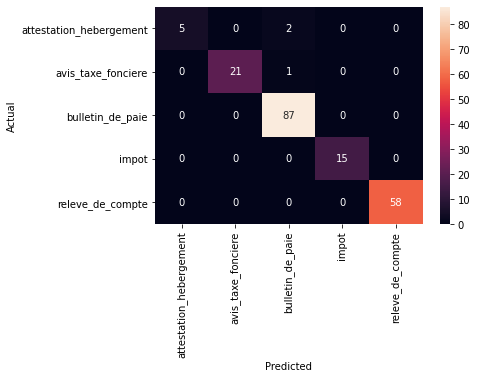

In [89]:
import seaborn as sns

results = {'y_Actual':y_test, 'y_Predicted':y_pred}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')

## Random Forest Modèle 

In [90]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model
rfc = RandomForestClassifier()

In [91]:
from sklearn.model_selection import GridSearchCV


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [92]:
# fit du model
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [93]:
# Print the tuned parameters 
print("Tuned Decision Tree Parameters: {}".format(clf_svm.best_params_))

Tuned Decision Tree Parameters: {'C': 0.25, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear', 'shrinking': True}


In [94]:
#Affichage des prédictions
y_pred = CV_rfc.predict(X_test)
y_pred

array(['releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compte', 'avis_taxe_fonciere', 'impot',
       'bulletin_de_paie', 'releve_de_compte', 'bulletin_de_paie',
       'bulletin_de_paie', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'releve_de_compte',
       'releve_de_compte', 'releve_de_compte', 'impot',
       'bulletin_de_paie', 'bulletin_de_paie', 'impot',
       'bulletin_de_paie', 'bulletin_de_paie', 'bulletin_de_paie',
       'bulletin_de_paie', 'bulletin_de_paie', 'bulletin_de_paie',
       'bulletin_de_paie', 'impot', 'releve_de_compte',
       'bulletin_de_paie', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'bulletin_de_paie', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_

In [95]:
df_results = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':y_pred}, columns=['y_Actual', 'y_Predicted'])
df_results

,y_Actual,y_Predicted
571,releve_de_compte,releve_de_compte
304,bulletin_de_paie,bulletin_de_paie
308,bulletin_de_paie,bulletin_de_paie
590,releve_de_compte,releve_de_compte
614,releve_de_compte,releve_de_compte
...,...,...
641,releve_de_compte,releve_de_compte
181,bulletin_de_paie,bulletin_de_paie
283,bulletin_de_paie,bulletin_de_paie
657,releve_de_compte,releve_de_compte


In [96]:
#Affichage d'un compte rendu des valeurs des métriques d'évaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(classification_report(y_test, y_pred))

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

                         precision    recall  f1-score   support

attestation_hebergement       0.00      0.00      0.00         7
     avis_taxe_fonciere       1.00      0.95      0.98        22
       bulletin_de_paie       0.90      0.98      0.94        87
                  impot       1.00      0.93      0.97        15
       releve_de_compte       0.97      1.00      0.98        58

               accuracy                           0.94       189
              macro avg       0.77      0.77      0.77       189
           weighted avg       0.91      0.94      0.92       189

Model accuracy score: 0.9418


C:\Users\adrien\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
#test Over Fitting ou non

print('Training set score: {:.4f}'.format(CV_rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(CV_rfc.score(X_test, y_test)))

Training set score: 0.9854
Test set score: 0.9418


In [98]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 0  0  7  0  0]
 [ 0 21  1  0  0]
 [ 0  0 85  0  2]
 [ 0  0  1 14  0]
 [ 0  0  0  0 58]]

True Positives(TP) =  0

True Negatives(TN) =  21

False Positives(FP) =  0

False Negatives(FN) =  0


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

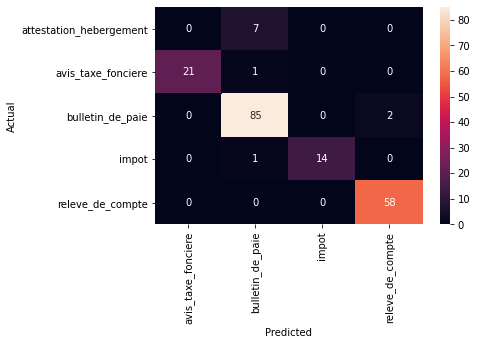

In [99]:
results = {'y_Actual':y_test, 'y_Predicted':y_pred}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [100]:
importance = CV_rfc.best_estimator_.feature_importances_
importance_df = pd.DataFrame(importance, index=X_train.columns, 
                      columns=["Importance"])
importance_df = importance_df.sort_values(by=['Importance'], ascending=False)
importance_df[:15]

,Importance
bulletin,0.037955
avis,0.036885
payer,0.033516
compte,0.033217
gout,0.030753
impot,0.030739
prélèvement,0.022209
département,0.021986
financ,0.021938
taxe,0.020757


### XGB - Gradient Boosting Classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV  #Perforing grid search

In [19]:
clf = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [20]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [21]:
clf_xgb_cv = GridSearchCV(
    estimator=clf,
    param_grid=parameters,
)

In [22]:
clf_xgb_cv.fit(X_train, y_train)

C:\Users\adrien\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=None, tree_method=None

In [23]:
# Print the tuned parameters 
print("Tuned Decision Tree Parameters: {}".format(clf_xgb_cv.best_params_))

Tuned Decision Tree Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 140}


In [24]:
#Affichage des prédictions
y_pred = clf_xgb_cv.predict(X_test)
y_pred

array(['releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compte', 'avis_taxe_fonciere', 'impot',
       'bulletin_de_paie', 'releve_de_compte', 'bulletin_de_paie',
       'attestation_hebergement', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'releve_de_compte',
       'releve_de_compte', 'releve_de_compte', 'impot',
       'bulletin_de_paie', 'bulletin_de_paie', 'impot',
       'bulletin_de_paie', 'bulletin_de_paie', 'bulletin_de_paie',
       'bulletin_de_paie', 'bulletin_de_paie', 'bulletin_de_paie',
       'bulletin_de_paie', 'impot', 'releve_de_compte',
       'bulletin_de_paie', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'bulletin_de_paie', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compte', 'bu

In [25]:
df_results = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':y_pred}, columns=['y_Actual', 'y_Predicted'])
df_results

,y_Actual,y_Predicted
571,releve_de_compte,releve_de_compte
304,bulletin_de_paie,bulletin_de_paie
308,bulletin_de_paie,bulletin_de_paie
590,releve_de_compte,releve_de_compte
614,releve_de_compte,releve_de_compte
...,...,...
641,releve_de_compte,releve_de_compte
181,bulletin_de_paie,bulletin_de_paie
283,bulletin_de_paie,bulletin_de_paie
657,releve_de_compte,releve_de_compte


In [26]:
#Affichage d'un compte rendu des valeurs des métriques d'évaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(classification_report(y_test, y_pred))

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

                         precision    recall  f1-score   support

attestation_hebergement       1.00      0.57      0.73         7
     avis_taxe_fonciere       1.00      1.00      1.00        22
       bulletin_de_paie       0.96      1.00      0.98        87
                  impot       1.00      0.93      0.97        15
       releve_de_compte       1.00      1.00      1.00        58

               accuracy                           0.98       189
              macro avg       0.99      0.90      0.93       189
           weighted avg       0.98      0.98      0.98       189

Model accuracy score: 0.9788


In [27]:
#test Over Fitting ou non

print('Training set score: {:.4f}'.format(clf_xgb_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_xgb_cv.score(X_test, y_test)))

Training set score: 0.9987
Test set score: 0.9788


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

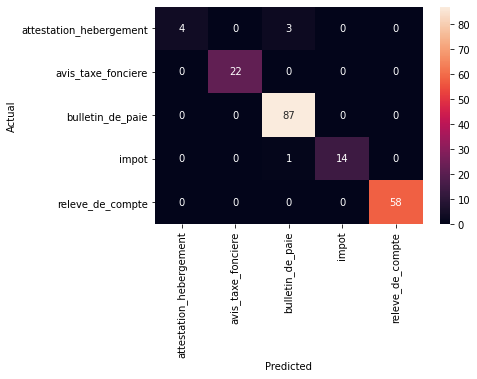

In [28]:
import seaborn as sns

results = {'y_Actual':y_test, 'y_Predicted':y_pred}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [112]:
importance = clf_xgb_cv.best_estimator_.feature_importances_
importance_df = pd.DataFrame(importance, index=X_train.columns, 
                      columns=["Importance"])
importance_df = importance_df.sort_values(by=['Importance'], ascending=False)
importance_df[:15]

,Importance
commune,0.100223
bulletin,0.095864
département,0.065715
opération,0.063117
année,0.062870
emploi,0.054018
compte,0.048747
taxe,0.033782
relever,0.033690
fiscal,0.031169


### MLP - Classifier Perceptron Multi-Couches

In [114]:
mlp_gs = MLPClassifier(max_iter=100)

In [115]:
import numpy as np

parameter_space = {
    'hidden_layer_sizes': np.arange(1, 10),
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [116]:
CVclf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

In [117]:
CVclf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

C:\Users\adrien\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [118]:
# Print the tuned parameters 
print("Tuned Decision Tree Parameters: {}".format(CVclf.best_params_))

Tuned Decision Tree Parameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': 9, 'learning_rate': 'constant', 'solver': 'adam'}


In [119]:
#Affichage des prédictions
y_pred = CVclf.predict(X_test)
y_pred

array(['releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compte', 'avis_taxe_fonciere', 'impot',
       'bulletin_de_paie', 'releve_de_compte', 'bulletin_de_paie',
       'attestation_hebergement', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'releve_de_compte',
       'releve_de_compte', 'releve_de_compte', 'impot',
       'bulletin_de_paie', 'bulletin_de_paie', 'impot',
       'bulletin_de_paie', 'bulletin_de_paie', 'bulletin_de_paie',
       'bulletin_de_paie', 'bulletin_de_paie', 'attestation_hebergement',
       'bulletin_de_paie', 'impot', 'releve_de_compte',
       'bulletin_de_paie', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'releve_de_compte', 'bulletin_de_paie', 'bulletin_de_paie',
       'bulletin_de_paie', 'releve_de_compte', 'bulletin_de_paie',
       'releve_de_compt

In [120]:
df_results = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':y_pred}, columns=['y_Actual', 'y_Predicted'])
df_results

,y_Actual,y_Predicted
571,releve_de_compte,releve_de_compte
304,bulletin_de_paie,bulletin_de_paie
308,bulletin_de_paie,bulletin_de_paie
590,releve_de_compte,releve_de_compte
614,releve_de_compte,releve_de_compte
...,...,...
641,releve_de_compte,releve_de_compte
181,bulletin_de_paie,bulletin_de_paie
283,bulletin_de_paie,bulletin_de_paie
657,releve_de_compte,releve_de_compte


In [121]:
#Affichage d'un compte rendu des valeurs des métriques d'évaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(classification_report(y_test, y_pred))

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

                         precision    recall  f1-score   support

attestation_hebergement       1.00      0.71      0.83         7
     avis_taxe_fonciere       1.00      1.00      1.00        22
       bulletin_de_paie       0.98      0.99      0.98        87
                  impot       1.00      1.00      1.00        15
       releve_de_compte       0.98      1.00      0.99        58

               accuracy                           0.98       189
              macro avg       0.99      0.94      0.96       189
           weighted avg       0.98      0.98      0.98       189

Model accuracy score: 0.9841


In [122]:
#test Over Fitting ou non

print('Training set score: {:.4f}'.format(clf_xgb_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_xgb_cv.score(X_test, y_test)))

Training set score: 0.9987
Test set score: 0.9788


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

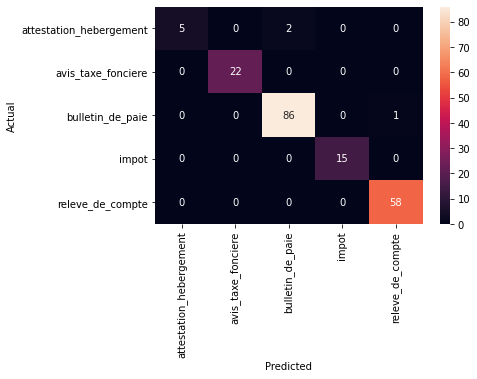

In [123]:
import seaborn as sns

results = {'y_Actual':y_test, 'y_Predicted':y_pred}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')